                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

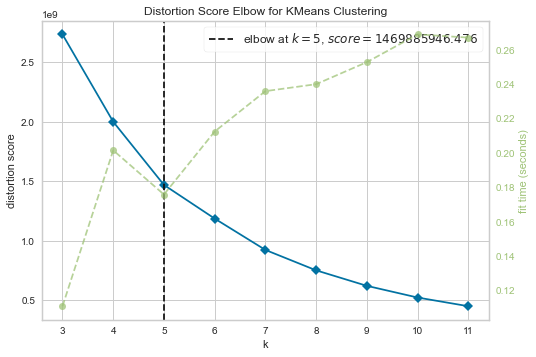

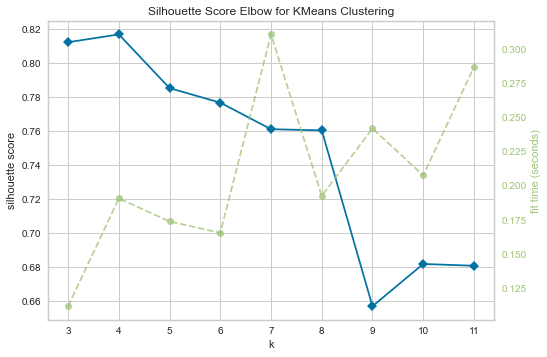

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [20]:
#Ejercicio 1
#Descarga el dataset adjunto y clasifica los diferentes registros utilizando el algoritmo de K-means.
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


#Importando el conjunto de datos
datos = pd.read_csv('Facebook.csv') 
datos.columns
print(datos.head())
datos.dtypes
del(datos['Column1'])
print(datos.head())
datos.dtypes
datos.drop(['status_id','status_type','status_published','Column2', 'Column3', 'Column4'], axis = 'columns', inplace=True)
print(datos.head())
datos.dtypes

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_datos = scaler.fit_transform(datos)

# Identificar valores nulos
# Todas las columnas tienen que tener 14170 valores no nulos
datos.info()

from sklearn.cluster import KMeans
# Instanciar el modelo
model = KMeans()

# importar el visualizador del metodo del codo
!pip install yellowbrick
from yellowbrick.cluster import KElbowVisualizer

# Instanciar el visualizador
vis = KElbowVisualizer(
    model, k = (3,12), metric='distortion', locate_elbow = True
)
# Ajustar los datos. No tendremos en cuenta los ID de usuario
vis.fit(datos)
# Visualizar
vis.show()

#indice silhouette

# Instanciar el visualizador
vis = KElbowVisualizer(
    model, k = (3,12), metric='silhouette', locate_elbow = False
)
# Ajustar los datos. No tendremos en cuenta los ID de usuario
vis.fit(datos)
# Visualizar
vis.show()

                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  Column1  Column2  Column3  Column4  
0          1         1           0      NaN      

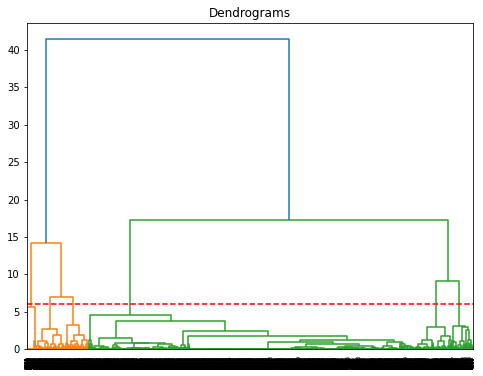

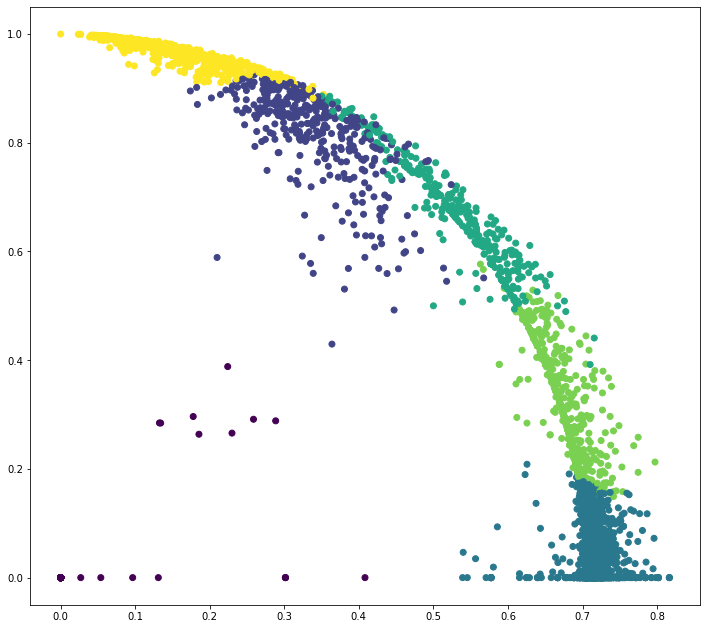

In [1]:
#Ejercicio 2
#Clasifica los distintos registros utilizando el algoritmo de clustering jerárquico.

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


#Importando el conjunto de datos
datos2 = pd.read_csv('Facebook.csv') 
datos2.columns
print(datos2.head())
datos2.dtypes
datos2.drop(['status_id','status_type','status_published','Column1','Column2', 'Column3', 'Column4'], axis = 'columns', inplace=True)
print(datos2.head())
datos2.dtypes

#normalización de datos
from sklearn.preprocessing import normalize
data_scaled = normalize(datos2)
data_scaled = pd.DataFrame(data_scaled, columns=datos2.columns)
data_scaled.head()


import scipy.cluster.hierarchy as shc
plt.figure(figsize=(8, 6))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_scaled, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')
plt.show()
#división de cluster
cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_scaled)

#visualización del cluster

plt.figure(figsize=(12, 11))  
plt.scatter(data_scaled['num_reactions'], data_scaled['num_comments'], c=cluster.labels_) 
plt.show()


In [21]:
#Ejercicio 3
#Calcula el rendimiento del clustering mediante un parámetro como puede ser silueta.
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
from sklearn.metrics import adjusted_rand_score

#Importando el conjunto de datos
datos3 = pd.read_csv('Facebook.csv') 
datos3.columns
print(datos.head())
datos3.dtypes
datos3.drop(['status_id','status_type','status_published','Column1','Column2', 'Column3', 'Column4'], axis = 'columns', inplace=True)
print(datos3.head())
datos3.dtypes

from sklearn.preprocessing import StandardScaler
scaled_datos3 = scaler.fit_transform(datos3)
# Instantiate k-means and dbscan algorithms
kmeans = KMeans(n_clusters=2)
dbscan = DBSCAN(eps=0.3)

# Fit the algorithms to the features
kmeans.fit(scaled_datos3)
dbscan.fit(scaled_datos3)

# Compute the silhouette scores for each algorithm
kmeans_silhouette = silhouette_score(
    scaled_datos3, kmeans.labels_
).round(2)
dbscan_silhouette = silhouette_score(
   scaled_datos3, dbscan.labels_
).round (2)
kmeans_silhouette


dbscan_silhouette

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1   
3            111             0           0        111          0         0   
4            213             0           0        204          9         0   

   num_hahas  num_sads  num_angrys  
0          1         1           0  
1          0         0           0  
2          1         0           0  
3          0         0           0  
4          0         0           0  
   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2            227           236          57        204         21         1 

0.02